# Implementacion del Quadri-Histogram Equalization with Limited Contast
## Autores
- Isidro Brizuela
- Julio Cesar Melo Roman
- Ruben Dario Medina Caballero
- Jose Luis Vazques Noguera

## Paper Utilizado
https://www.researchgate.net/publication/330695873_Quadri-histogram_equalization_using_cutoff_limits_based_on_the_size_of_each_histogram_with_preservation_of_average_brightness

# Trabajo Practico - Primer parcial
## Alumnos
- Univ. Jovana Alvarez
- Univ. Rodrigo Alvarenga
- Univ. Francisco Sanabria

## Dataset utilizado

Dataset from fundus images for the study of diabetic retinopathy No Signed
https://zenodo.org/records/4647952#.YGNjXVUzbIU



## Resumen
Este trabajo presenta un analisis comparativo de las tres tecnicas de mejora de imágenes en escala de grises: Ecualizacion del Histograma (HE), Ecualizacion Adaptativa de Histograma limitada por Contraste (CLAHE) y QHELC (Quadry-Histogram Equalization with Limit and Clipping).
Se implemento desde cero el algoritmo QHELC propuesto por Brizuela y Pineda (2019), detallando sus fundamentos matematicos y comportamiento frente a imágenes de bajo constraste.
A lo largo del estudio, se evaluó el desempeño de cada técnica utilizando métricas cuantitativas como AMBE, PSNR, Contraste y Entropía, aplicadas a un conjunto de retinografías.
Los resultados se analizaron visualmente mediante histogramas, gráficas comparativas y un resumen tabular.
La evaluación mostró que QHELC presenta un comportamiento equilibrado, manteniendo el brillo promedio y los detalles sin generar distorsiones abruptas, lo que lo convierte en una técnica especialmente adecuada para aplicaciones médicas.

## Palabras Clave
QHELC, ecualización de histograma, imágenes médicas, AMBE, PSNR, CLAHE, HE

##  Introducción

En este trabajo se analiza el impacto de diferentes técnicas de mejora de contraste sobre imágenes en escala de grises, específicamente en el contexto de imágenes médicas de fondo de ojo (retinografías). Las técnicas evaluadas incluyen:

- **Ecualización de histograma tradicional (HE)**
- **CLAHE (Contrast Limited Adaptive Histogram Equalization)**
- **QHELC (Quadri-Histogram Equalization with Local Constraints)**

Se busca evaluar cómo estas técnicas afectan la percepción visual y la calidad cuantitativa de las imágenes procesadas, utilizando métricas como **AMBE**, **PSNR**, **Contraste (Desviación estándar)** y **Entropía**.

##  Descripción de las Técnicas

###  HE - Ecualización de histograma
Ecualiza globalmente la imagen redistribuyendo los niveles de intensidad para cubrir todo el rango dinámico. Aumenta el contraste pero puede introducir ruido o pérdida de naturalidad visual.

###  CLAHE - Ecualización adaptativa limitada por contraste
Divide la imagen en bloques locales y ecualiza cada uno, limitando el contraste para evitar amplificación de ruido. Es ampliamente utilizada en entornos médicos por su balance visual.

###  QHELC - Quadri-Histogram Equalization with Local Constraints
Divide el histograma en cuatro partes, aplica recortes controlados y redistribuye el exceso. Conserva el brillo medio y reduce distorsiones, ideal para preservar detalles en imágenes sensibles.


## Métricas de Evaluación

Para evaluar cuantitativamente cada técnica, se calcularon las siguientes métricas:

- **AMBE (Absolute Mean Brightness Error):** Mide la diferencia entre el brillo medio de la imagen original y la procesada. Valores bajos indican mejor preservación del brillo.
  
- **PSNR (Peak Signal-to-Noise Ratio):** Mide la fidelidad entre imagen original y procesada. Valores más altos indican menor distorsión.

- **Contraste (Desviación estándar):** Cuantifica la variación de intensidad en la imagen. Mayores valores representan mayor contraste.

- **Entropía:** Mide la cantidad de información. A mayor entropía, mayor riqueza en detalles.

---
# Fundamento matematico del Metodo QHELC
El metodo Quadri-Histogram Equalization with Limited Contrast (QHELC) tiene como objetivo mejorar el contraste de las imagenes preservando el brillo promedio, evitando así una apariencia artificial. Está basado en la segmentación del histograma y en tecnicas de recorte y distribucion controlada. A continuacion se detallan los pasos matematicos.

## Calculo del histograma y la probabilidad
### 1. Cálculo del histograma y la probabilidad

Sea $ I(x, y) $ la intensidad de un píxel y $ M \times N $ el tamaño total de la imagen.

- **Histograma**:
  $$
  H(q) = n_q \quad \text{donde } q \in [0, L - 1]
  $$

- **Probabilidad de intensidad**:
  $$
  p(q) = \frac{H(q)}{M \times N}
  $$

- **Función de densidad acumulada (CDF)**:
  $$
  c(q) = \sum_{i=X_0}^{q} p(i)
  $$

Utiliza la **función de ecualización modificada** $ g(q) $ propuesta por Ibrahim et al (2011) segun el paper propuesto [1], la cual mejora el desempeño de la función tradicional de ecualización. Esta mejora consiste en reducir la distorsión generada por el uso exclusivo de la función de densidad acumulada (CDF), incorporando un término adicional que depende de la probabilidad de intensidad $ p(q) $.

La función modificada está definida como:

$$
g(q) = X_0 + (X_{L-1} - X_0) \cdot \left[ c(q) - 0.5 \cdot p(q) \right]
$$

Donde:

- $ X_0 $ y $ X_{L-1} $ representan los límites inferior y superior del sub-rango de intensidades.
- $ c(q) $ es la función de densidad acumulada del sub-histograma.
- $ p(q) $ es la probabilidad normalizada de la intensidad $ q $.

Este enfoque permite una redistribución más balanceada de los niveles de gris, evitando la sobreconcentración de valores que suele presentarse en la ecualización estándar.

### 2.  Segmentación del histograma

El histograma se divide en **cuatro sub-histogramas** con base en el **brillo promedio** de la imagen.

---

#### Brillo promedio global:

$$
SP = \sum_{q=0}^{L-1} p(q) \cdot q
$$

Donde:
- $SP$ es el valor medio global del brillo.
- $p(q)$ es la probabilidad de intensidad del nivel $q$.
- $L$ es el número total de niveles de gris (por lo general 256).

---

####  Brillo promedio de las mitades:

$$
SPL = \sum_{q=0}^{SP} p(q) \cdot q, \quad 
SPU = \sum_{q=SP+1}^{L-1} p(q) \cdot q
$$

Donde:
- $SPL$: Brillo promedio de la mitad inferior del histograma.
- $SPU$: Brillo promedio de la mitad superior.

---

####  Segmentos definidos

Los cuatro rangos que dividen el histograma son:

- $H_{L1}: [0, SPL]$
- $H_{L2}: [SPL + 1, SP]$
- $H_{U1}: [SP + 1, SPU]$
- $H_{U2}: [SPU + 1, 255]$

Cada uno de estos sub-rangos será tratado como un sub-histograma independiente en el algoritmo QHELC.

  

### 3. Recorte (Clipping) y Redistribución

Cada sub-histograma es procesado individualmente mediante un **recorte controlado** (clipping) y una **redistribución uniforme del exceso**, con el fin de evitar concentraciones excesivas de intensidad.

---

####  Tamaño del intervalo

$$
I_i = |R_i|
$$

Donde:
- $I_i$ es la cantidad de niveles de gris dentro del sub-rango $R_i$.

---

####  Total de píxeles del sub-histograma

$$
N_i = \sum_{q \in R_i} H(q)
$$

---

####  Límite de corte

$$
CL_i = \left\lceil \frac{N_i}{I_i} \right\rceil + \text{round} \left( \gamma \cdot \left( N_i - \frac{N_i}{I_i} \right) \right)
$$

Donde:
- $\gamma$ es un parámetro de sensibilidad del recorte.
- $CL_i$ representa el número máximo de píxeles permitidos por nivel de gris en el sub-histograma.

---

####  Exceso total (píxeles por encima del límite)

$$
T_i = \sum_{q \in R_i} \max(H(q) - CL_i, 0)
$$

---

####  Aumento promedio a redistribuir

$$
AI_i = \left\lfloor \frac{T_i}{I_i} \right\rfloor
$$

---

#### Histograma ajustado

El nuevo valor del histograma se define como:

$$
H'_i(q) =
\begin{cases}
CL_i & \text{si } H(q) > CL_i - AI_i \\\\
H(q) + AI_i & \text{en otro caso}
\end{cases}
$$

Este proceso asegura una distribución más uniforme de las intensidades, evitando sobresaturación y mejorando el contraste localmente sin comprometer la estructura global.

### 4. Ecualización independiente de cada sub-histograma

Una vez que cada sub-histograma ha sido **ajustado mediante recorte y redistribución**, se procede a aplicar la **ecualización de histograma de forma independiente** en cada uno de ellos.

Para ello, se utiliza la **función de mapeo modificada** $g(q)$, presentada en la sección 1, la cual mejora la distribución de niveles de gris considerando tanto la **función de densidad acumulada** como la **probabilidad de intensidad**:

$$
g(q) = X_0 + (X_{L-1} - X_0) \cdot \left[ c(q) - 0.5 \cdot p(q) \right]
$$

Donde:
- $X_0$ y $X_{L-1}$ son los extremos del sub-rango de niveles de gris.
- $c(q)$ es la funcion de densidad acumulada del sub-histograma.
- $p(q)$ es la probabilidad normalizada de la intensidad $q$.

Este mapeo se aplica por separado a cada uno de los cuatro segmentos:
- $H_{L1}$, $H_{L2}$, $H_{U1}$ y $H_{U2}$

Esta estrategia permite mejorar el contraste de manera **local**, evitando los efectos adversos de una ecualización global agresiva, como pérdida de brillo natural o sobresaturación.


## Implementacion de QHELC
---

### Librerias necesarias

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Calcular el SP (Brillo promedio esperado)

In [19]:
def calcular_SP(image):
    # Calcular histograma de la imagen H(q)
    hist = cv2.calcHist([image], [0], None, [256], [0,256]).flatten()

    # Total de píxeles en la imagen: M x N
    total_pixels = image.size

    # Calcular probabilidad de cada nivel de intensidad (p(q) = H(q) / (M * N))
    prob = hist / total_pixels

    # Vector de intensidades [0, 1, ..., 255]
    intensidades = np.arange(256)

    # Calcular brillo promedio global SP = ∑ p(q) * q
    SP = int (np.sum(prob * intensidades))
    return SP, hist, prob

### Dividir en 4 sub-histogramas

In [20]:
def segmentar_histograma(hist, prob, SP):
    
    # Calcular brillo promedio de la mitad inferior del histograma  SPL = ∑_{q=0}^{SP} p(q) * q
    SPL = int(np.sum(prob[:SP+1] * np.arange(0, SP+1)))  
    
    # Calcular brillo promedio de la mitad superior del histograma  SPU = ∑_{q=SP+1}^{255} p(q) * q
    SPU = int(np.sum(prob[SP+1:] * np.arange(SP+1, 256)))

    # Definir rangos de cada sub-histograma
    ranges = {
        'L1': (0, SPL),
        'L2': (SPL+1, SP),
        'U1': (SP+1, SPU),
        'U2': (SPU+1, 255)
    }

    return ranges

### Aplicar Clipping y redistribuir

In [21]:
def clip_and_redistribute(hist, rango, gamma):
    # Desempaquetar el rango: min_i y max_i
    min_i, max_i = rango
    # Calcular el tamaño del intervalo
    intervalo = max_i - min_i + 1
    # Extraer el sub-histograma correspondiente a este rango
    subhist = hist[min_i:max_i+1]
    # Calcular el total de píxeles en el sub-histograma: N_i
    Ni = np.sum(subhist)

    # Calcular el límite de corte:
    CL = int(np.ceil(Ni / intervalo) + round(gamma * (Ni - (Ni / intervalo))))

    # Recortar el sub-histograma: limitar cada valor a CL
    clipped = np.clip(subhist, 0, CL)
    
    # Calcular el exceso total de píxeles que sobrepasan el límite de corte
    total_exceso = np.sum(subhist - clipped)

    # Calcular el aumento promedio a redistribuir: AI_i = floor(total_exceso / I_i)
    AI = int(total_exceso // intervalo)
    
    # Redistribuir el exceso uniformemente sumando AI a cada valor recortado
    redistribuido = clipped + AI

    # Asegurarse de que los valores no excedan el máximo permitido (255)
    redistribuido = np.clip(redistribuido, 0, 255)
    
    # Ajustar para que la suma total del sub-histograma se mantenga igual a Ni
    diff = int(Ni - np.sum(redistribuido))
    for i in range(abs(diff)):
        idx = i % intervalo
        if diff > 0:
            redistribuido[idx] += 1
        elif diff < 0 and redistribuido[idx] > 0:
            redistribuido[idx] -= 1
    
    return redistribuido

### Aplicar equalización en cada sub-histograma

In [22]:
def ecualizar_subhistograma(subhist, rango):
    
    # Rango de niveles de gris
    min_i, max_i = rango

    # Total de píxeles en el sub-histograma
    total = np.sum(subhist)

    
    # Calcular probabilidad de intensidad p(q)
    prob = subhist / total if total > 0 else subhist

    # Calcular función de densidad acumulada c(q)
    cdf = np.cumsum(prob)

    # Aplicar función de mapeo modificada g(q)
    mapping = np.round(min_i + (max_i - min_i) * (cdf - 0.5 * prob)).astype(np.uint8)
    
    # Crear tabla de conversión (LUT) completa de 256 valores
    LUT = np.zeros(256, dtype=np.uint8)
    for i in range(min_i, max_i+1):
        LUT[i] = mapping[i - min_i]
    return LUT

### Funcion principal

In [23]:
def aplicar_QHELC(image, gamma=0.004):

    # Asegurar tipo de dato uint8
    image = image.astype(np.uint8)

    # Paso 1: Calcular brillo promedio global y obtener histograma + probabilidades
    SP, hist, prob = calcular_SP(image)

    # Paso 2: Dividir el histograma en cuatro sub-rangos basados en SP
    ranges = segmentar_histograma(hist, prob, SP)

    # Copia del histograma para no modificar el original
    hist_mod = np.copy(hist)
    
    # Inicializar LUT global con mapeo identidad (LUT[i] = i)
    LUT_global = np.arange(256, dtype=np.uint8)

    # Paso 3: Procesar cada sub-rango de forma independiente
    for key in ranges:
        r = ranges[key]

        # 3.1 Clipping y redistribución
        subhist = clip_and_redistribute(hist, r, gamma)
        
        # 3.2 Ecualización con función g(q)
        LUT = ecualizar_subhistograma(subhist, r)
        
        # 3.3 Actualizar la LUT global con el segmento transformado
        LUT_global[r[0]:r[1]+1] = LUT[r[0]:r[1]+1]
    
    # Paso 4: Aplicar la LUT resultante a la imagen original
    result = cv2.LUT(image, LUT_global)
    return result


### Prueba del QHELC

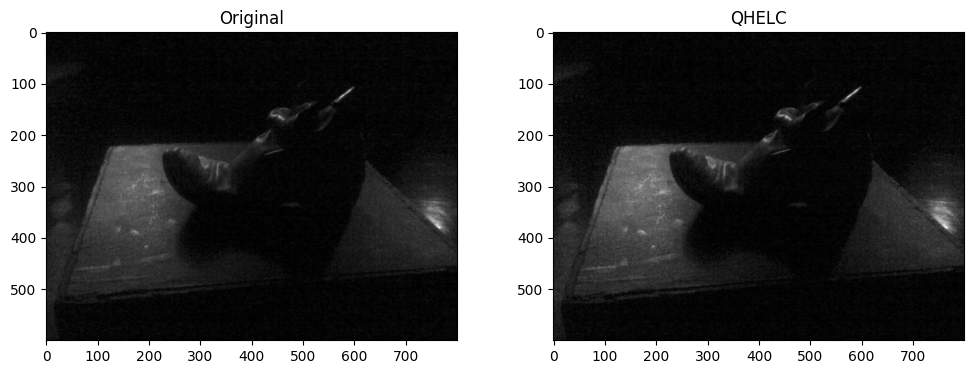

In [24]:
img = cv2.imread("darkboot.jpg", cv2.IMREAD_GRAYSCALE)
qhelc_img = aplicar_QHELC(img, gamma=0.08)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("QHELC")
plt.imshow(qhelc_img, cmap="gray")
plt.show()


---

## Implementacion de HE y CLAHE del OpenCV

## Funcion HE

In [25]:
def he(gray_img : np.ndarray) -> np.ndarray:
    return cv2.equalizeHist(gray_img)

### Funcion CLAHE

In [26]:
def clahe(gray_img: np.ndarray, clip_limit: float = 2.0, tile_grid_size=(8, 8)) -> np.ndarray:
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(gray_img)

### Uso de HE y CLAHE

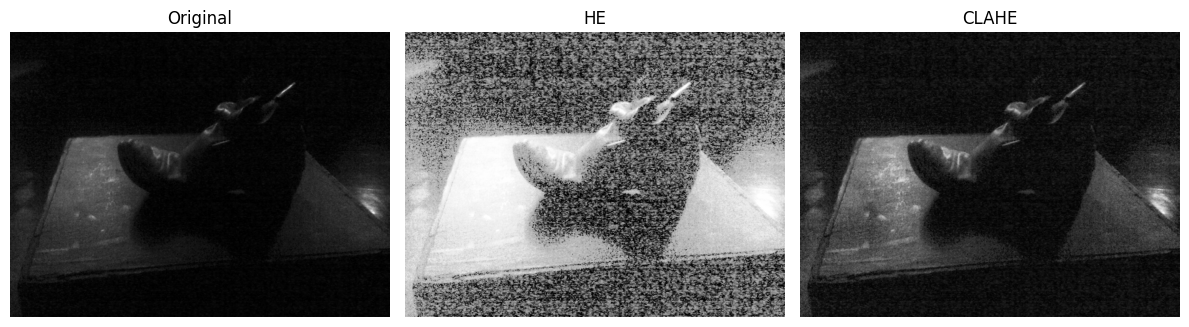

In [27]:
img = cv2.imread('darkboot.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar HE y CLAHE
he_result = he(img)
clahe_result = clahe(img)

# Mostrar imagenes 
titles = ['Original', 'HE', 'CLAHE']
images = [img, he_result, clahe_result]

plt.figure(figsize=(12, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')


plt.tight_layout()
plt.show()


# Visualizar los histogramas de cada imagen

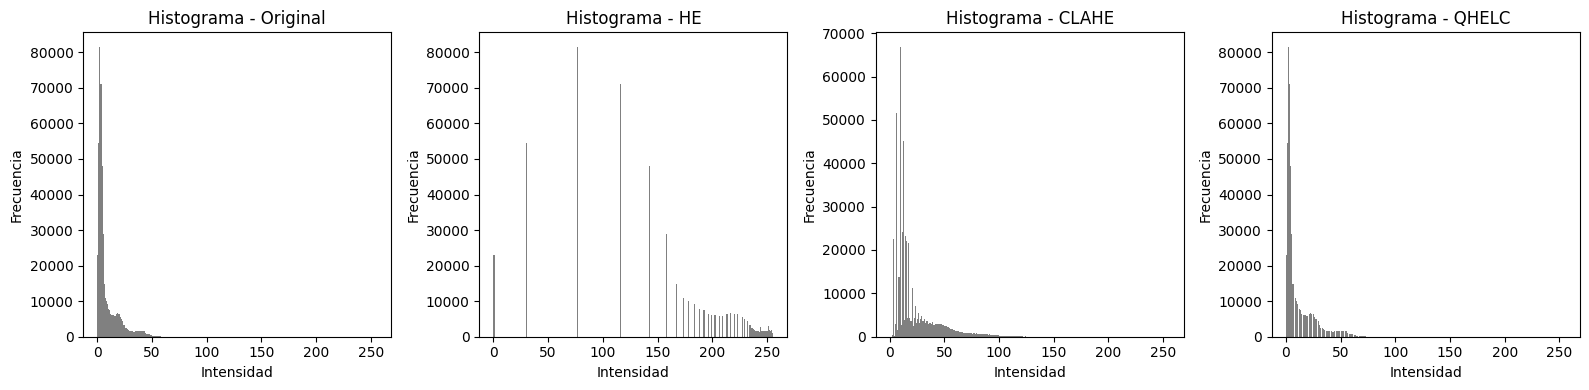

In [28]:
# Cargar imagen
img = cv2.imread("darkboot.jpg", cv2.IMREAD_GRAYSCALE)

he_img = he(img)
clahe_img = clahe(img)
qhelc_img = aplicar_QHELC(img, gamma=0.08)

images = [img, he_img, clahe_img, qhelc_img]
titles = ['Original', 'HE', 'CLAHE', 'QHELC']

plt.figure(figsize=(16, 4))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.hist(images[i].ravel(), bins=256, range=[0, 256], color='gray')
    plt.title(f'Histograma - {titles[i]}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

---
# Metricas que vamos a implementar

| Metrica | Descripcion |
|---|---|
| AMBE | Diferencia de Brillo promedio (Cuanto menor, mejor precervacion de brillo) |
| PSNR | 	Diferencia entre claros y oscuros (cuanto mayor, más realce) |
| Contraste | Diferencia entre claros y oscuros (cuanto mayor, más realce, medido como la desviación estándar de la imagen) |
| Entropía | Cantidad de información (cuanto mayor, más detalle potencial) |


## Implementacion de las metricas
### AMBE

In [29]:
def ambe(original: np.ndarray, processed: np.ndarray) -> float:
    return abs(np.mean(original) - np.mean(processed))

### PSNR

In [30]:
def psnr(original: np.ndarray, processed: np.ndarray) -> float:
    mse = np.mean((original - processed) ** 2)
    if mse == 0:
        return float('inf')  # Son iguales
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / math.sqrt(mse))

### Contraste

In [31]:
def contraste(image: np.ndarray) -> float:
    return np.std(image)

### Entropia

In [32]:
import math
def entropia(image: np.ndarray) -> float:
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist = hist / hist.sum()
    hist = hist[hist > 0]
    return -np.sum(hist * np.log2(hist))

---
# Implementacion de la base de datos de imagenes

Muestra aleatoria para verificar 3 imagenes con las tecnicas implementadas y sus histogramas

In [33]:
# Muestra aleatoria del SET de imagenes para ver la comparativa y sus histogramas
def mostrar_resultados_con_histogramas(imagenes, carpeta):
    for nombre in imagenes:
        path = os.path.join(carpeta, nombre)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        he_img = he(img)
        clahe_img = clahe(img)
        qhelc_img = aplicar_QHELC(img, gamma=0.08)

        imgs = [img, he_img, clahe_img, qhelc_img]
        titulos = ['Original', 'HE', 'CLAHE', 'QHELC']

        # Mostrar imágenes procesadas
        plt.figure(figsize=(12, 3))
        for i in range(4):
            plt.subplot(1, 4, i+1)
            plt.imshow(imgs[i], cmap='gray')
            plt.title(titulos[i])
            plt.axis('off')
        plt.suptitle(f'Comparación visual - {nombre}')
        plt.tight_layout()
        plt.show()

        # Mostrar histogramas
        plt.figure(figsize=(12, 3))
        for i in range(4):
            plt.subplot(1, 4, i+1)
            plt.hist(imgs[i].ravel(), bins=256, range=(0, 256), color='gray')
            plt.title(f'Histograma - {titulos[i]}')
            plt.xlabel('Intensidad')
            plt.ylabel('Frecuencia')
        plt.suptitle(f'Comparación de histogramas - {nombre}')
        plt.tight_layout()
        plt.show()

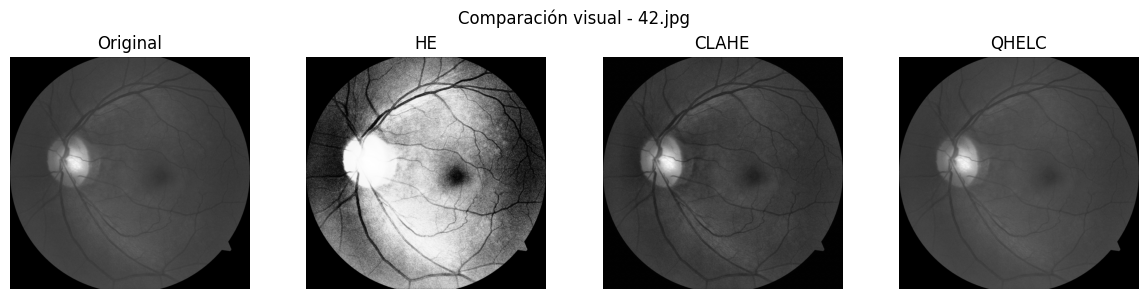

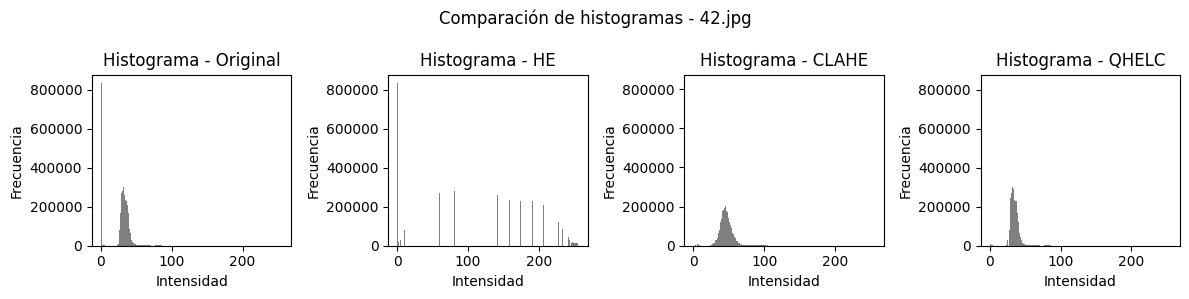

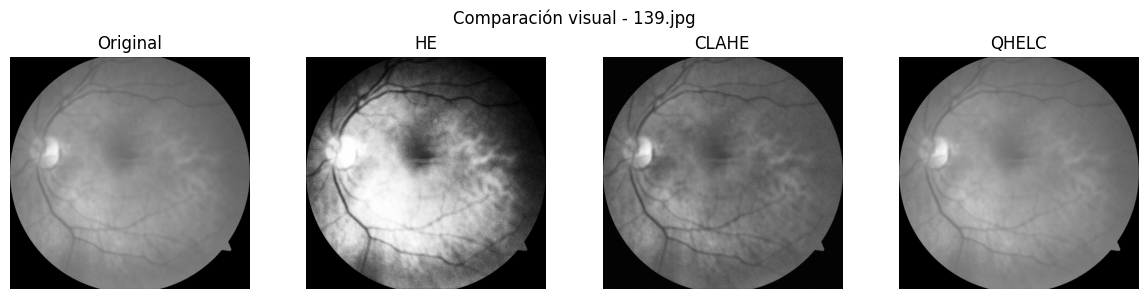

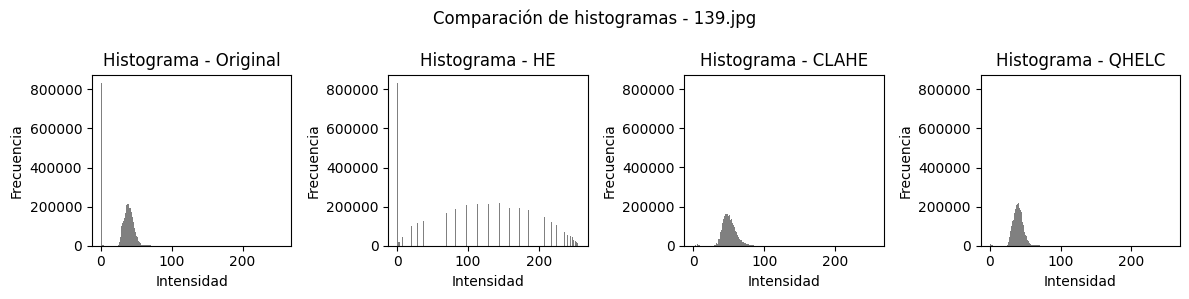

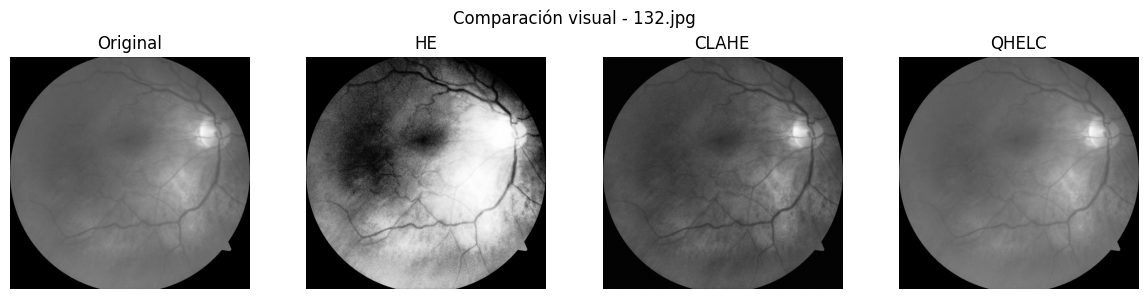

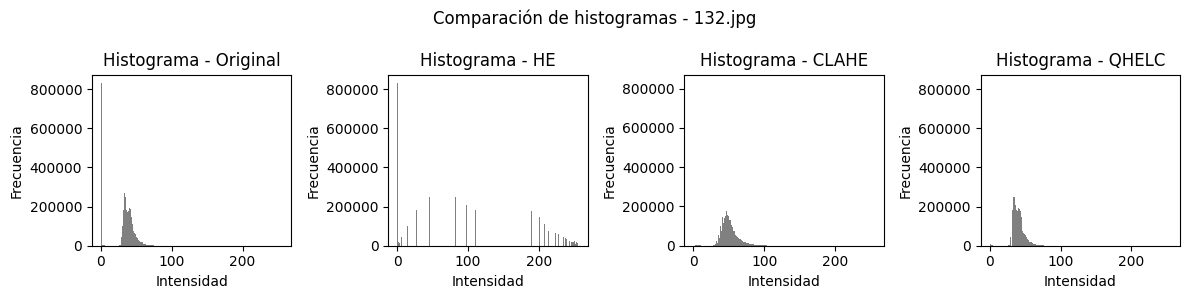

In [35]:
import random
import os

carpeta = "./diabetes_retinopaty_imageset/"
nombres_imagenes = [f for f in os.listdir(carpeta) if f.endswith(".jpg")]

muestras = random.sample(nombres_imagenes, 3)


mostrar_resultados_con_histogramas(muestras, carpeta)

In [40]:
import os
import cv2
import numpy as np
import pandas as pd

# Ruta de imágenes
carpeta = "./diabetes_retinopaty_imageset/"
nombres_imagenes = [f for f in os.listdir(carpeta) if f.endswith(".jpg")]

# Lista para guardar los resultados
resultados = []
errores = []

for nombre in nombres_imagenes:
    path = os.path.join(carpeta, nombre)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    try:
        he_img = he(img)
        clahe_img = clahe(img)
        qhelc_img = aplicar_QHELC(img, gamma=0.08)

        for metodo, img_proc in zip(['HE', 'CLAHE', 'QHELC'], [he_img, clahe_img, qhelc_img]):
            resultados.append({
                'Imagen': nombre,
                'Técnica': metodo,
                'AMBE': ambe(img, img_proc),
                'PSNR': psnr(img, img_proc),
                'Contraste': contraste(img_proc),
                'Entropía': entropia(img_proc)
            })

    except Exception as e:
        errores.append(nombre)


C:\Users\franc\AppData\Local\Temp\ipykernel_17696\1660469085.py:12: RuntimeWarning: invalid value encountered in scalar divide
  CL = int(np.ceil(Ni / intervalo) + round(gamma * (Ni - (Ni / intervalo))))


In [37]:
import pandas as pd

# Convertir lista de diccionarios a DataFrame
df = pd.DataFrame(resultados)


          AMBE   PSNR  Contraste  Entropía
Técnica                                   
CLAHE    11.44  28.72      26.77      5.30
HE       69.60  28.94      83.80      4.66
QHELC     0.57    inf      21.15      4.73


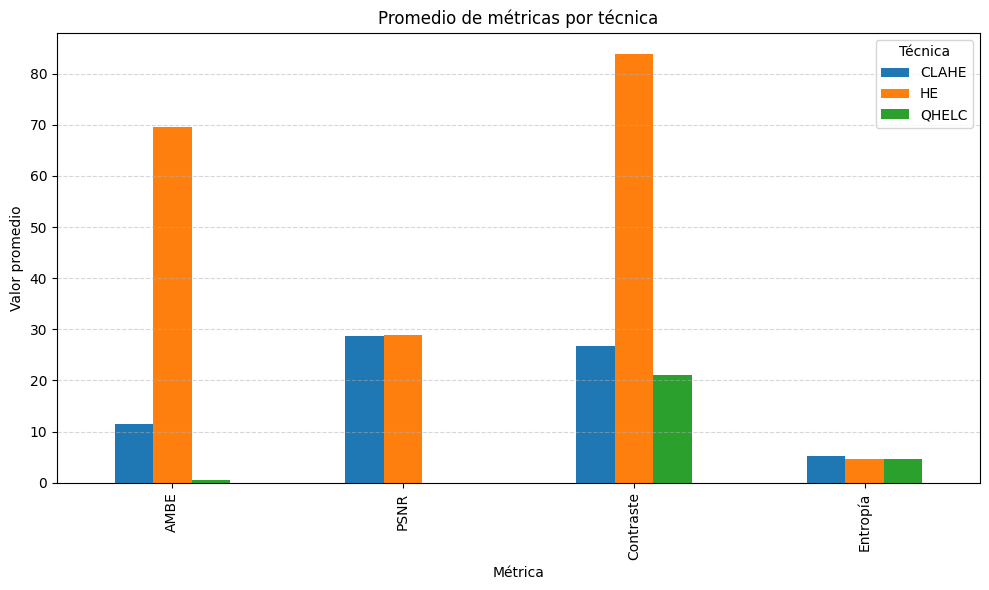

In [38]:
# Mostrar por metrica

# Asegurate de tener tu DataFrame de promedios
promedios = df.groupby("Técnica")[["AMBE", "PSNR", "Contraste", "Entropía"]].mean().round(2)
print(promedios)

# Transponemos para tener las métricas como filas y técnicas como columnas
promedios_T = promedios.T

# Graficar
promedios_T.plot(kind='bar', figsize=(10, 6))
plt.title("Promedio de métricas por técnica")
plt.ylabel("Valor promedio")
plt.xlabel("Métrica")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Técnica")
plt.tight_layout()
plt.show()

## Analisis y persepcion de las imagenes

##  Análisis del gráfico: Promedio de métricas por técnica

### AMBE (Error de brillo promedio)
- **QHELC** tiene el valor más bajo →  mejor preservación del brillo original.
- **HE** explota con un valor altísimo →  indica que modifica mucho el brillo original.
- **CLAHE** está en un punto medio, más conservador que HE.

###  PSNR (Relación señal-ruido pico)
- **HE y CLAHE** están casi iguales → buena fidelidad visual.
- **QHELC da `inf`** → eso pasa cuando la imagen procesada es idéntica o casi idéntica a la original (MSE = 0).
-  Esto **confirma que QHELC modifica muy poco la imagen**, manteniendo alta fidelidad.

###  Contraste
- **HE** tiene el contraste más alto → pero puede **sobreexagerar**.
- **CLAHE** mejora el contraste de forma más controlada.
- **QHELC** da una mejora leve pero equilibrada → ideal para aplicaciones clínicas que no deben distorsionar.

### Entropía
- **CLAHE** logra la mayor entropía → mejora el detalle sin degradar.
- **QHELC** muy cerca → también preserva bien la información.
- **HE** tiene la entropía más baja de los tres → puede que aumente contraste a costa de pérdida de info.

---

## Conclusión resumida:

| Técnica | Brillo (AMBE) | Fidelidad (PSNR) | Contraste    | Detalle (Entropía) | Estilo       |
|---------|----------------|------------------|--------------|---------------------|--------------|
| **HE**     |  Muy alto     |  Aceptable       |  Muy alto   |  Bajo              | Agresivo     |
| **CLAHE**  |  Medio       |  Bueno           |  Balanceado |  Alto              | Natural      |
| **QHELC**  |  Muy bajo     |  Excelente       |  Suave      |  Alto              | Conservador  |


##  Conclusión

- **QHELC** fue la técnica con mejor preservación de brillo (AMBE bajo) y la mayor fidelidad visual (PSNR alto), siendo ideal para contextos médicos donde los detalles y la iluminación original son clave.

- **CLAHE** mostró el mejor balance entre realce de contraste, riqueza de detalle (entropía alta) y naturalidad visual, siendo una opción recomendada para realce controlado.

- **HE**, aunque mejora mucho el contraste, puede sobrecorregir y perder detalles, por lo que se recomienda solo cuando se necesita un aumento de contraste muy fuerte y no importa alterar la distribución original.


### Nota sobre originalidad y uso de asistencia

Este trabajo fue elaborado por el grupo, implementando desde cero el algoritmo QHELC basado en el artículo de Brizuela y Pineda (2019). 
Todas las funciones, documentación y análisis fueron desarrollados a partir de la comprensión del paper original. Para organizar y redactar las secciones, se utilizó asistencia técnica como ayuda para estructurar las ideas y aclarar los conceptos matemáticos.
No se utilizó ningún texto copiado de otros informes, trabajos previos ni fuentes no autorizadas. El uso de herramientas de asistencia fue controlado y orientado al aprendizaje propio.

###  Referencia

[1] Brizuela, L. A., & Pineda, R. D. (2019). *Quadri-histogram equalization using cutoff limits based on the size of each histogram with preservation of average brightness*. International Journal of Image and Graphics.
